In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import plotly.express as px

import matplotlib.pyplot as plt


In [65]:
BASE_URL = "https://api-open.data.gov.sg/v2"


In [66]:
url = f"{BASE_URL}/real-time/api/air-temperature"
# url = f"{BASE_URL}/real-time/api/2-hour-weather-forecast"
response = requests.get(url)

response


<Response [200]>

In [67]:
data = response.json()
data

{'code': 0,
 'data': {'stations': [{'id': 'S109',
    'deviceId': 'S109',
    'name': 'Ang Mo Kio Avenue 5',
    'location': {'latitude': 1.3764, 'longitude': 103.8492}},
   {'id': 'S106',
    'deviceId': 'S106',
    'name': 'Pulau Ubin',
    'location': {'latitude': 1.4168, 'longitude': 103.9673}},
   {'id': 'S117',
    'deviceId': 'S117',
    'name': 'Banyan Road',
    'location': {'latitude': 1.256, 'longitude': 103.679}},
   {'id': 'S107',
    'deviceId': 'S107',
    'name': 'East Coast Parkway',
    'location': {'latitude': 1.3135, 'longitude': 103.9625}},
   {'id': 'S115',
    'deviceId': 'S115',
    'name': 'Tuas South Avenue 3',
    'location': {'latitude': 1.29377, 'longitude': 103.61843}},
   {'id': 'S102',
    'deviceId': 'S102',
    'name': 'Semakau Landfill',
    'location': {'latitude': 1.189, 'longitude': 103.768}},
   {'id': 'S60',
    'deviceId': 'S60',
    'name': 'Sentosa',
    'location': {'latitude': 1.25, 'longitude': 103.8279}},
   {'id': 'S50',
    'deviceId': '

In [68]:
data['data'].keys()

dict_keys(['stations', 'readings', 'readingType', 'readingUnit'])

In [69]:
data['data']['readings']

[{'timestamp': '2025-11-26T16:23:00+08:00',
  'data': [{'stationId': 'S109', 'value': 31.9},
   {'stationId': 'S106', 'value': 31.8},
   {'stationId': 'S117', 'value': 29.9},
   {'stationId': 'S107', 'value': 30.3},
   {'stationId': 'S115', 'value': 30.8},
   {'stationId': 'S102', 'value': 29.8},
   {'stationId': 'S60', 'value': 30.1},
   {'stationId': 'S50', 'value': 30.7},
   {'stationId': 'S44', 'value': 31},
   {'stationId': 'S43', 'value': 31.5},
   {'stationId': 'S24', 'value': 30.8},
   {'stationId': 'S06', 'value': 32},
   {'stationId': 'S111', 'value': 30.1}]}]

In [70]:
df = pd.json_normalize(
    data['data']['stations']
)
df

,id,deviceId,name,location.latitude,location.longitude
0,S109,S109,Ang Mo Kio Avenue 5,1.37640,103.84920
1,S106,S106,Pulau Ubin,1.41680,103.96730
2,S117,S117,Banyan Road,1.25600,103.67900
3,S107,S107,East Coast Parkway,1.31350,103.96250
4,S115,S115,Tuas South Avenue 3,1.29377,103.61843
5,S102,S102,Semakau Landfill,1.18900,103.76800
6,S60,S60,Sentosa,1.25000,103.82790
7,S50,S50,Clementi Road,1.33370,103.77680
8,S44,S44,Nanyang Avenue,1.34583,103.68166
9,S43,S43,Kim Chuan Road,1.33990,103.88780


In [71]:
df_temp = pd.json_normalize(
    data['data']['readings'][0]['data']
)
df_temp

,stationId,value
0,S109,31.9
1,S106,31.8
2,S117,29.9
3,S107,30.3
4,S115,30.8
5,S102,29.8
6,S60,30.1
7,S50,30.7
8,S44,31.0
9,S43,31.5


In [72]:
df = pd.merge(df, df_temp, left_on='id', right_on='stationId')
df

,id,deviceId,name,location.latitude,location.longitude,stationId,value
0,S109,S109,Ang Mo Kio Avenue 5,1.37640,103.84920,S109,31.9
1,S106,S106,Pulau Ubin,1.41680,103.96730,S106,31.8
2,S117,S117,Banyan Road,1.25600,103.67900,S117,29.9
3,S107,S107,East Coast Parkway,1.31350,103.96250,S107,30.3
4,S115,S115,Tuas South Avenue 3,1.29377,103.61843,S115,30.8
5,S102,S102,Semakau Landfill,1.18900,103.76800,S102,29.8
6,S60,S60,Sentosa,1.25000,103.82790,S60,30.1
7,S50,S50,Clementi Road,1.33370,103.77680,S50,30.7
8,S44,S44,Nanyang Avenue,1.34583,103.68166,S44,31.0
9,S43,S43,Kim Chuan Road,1.33990,103.88780,S43,31.5


In [73]:
df = df.rename(columns={
    'location.latitude': 'latitude',
    'location.longitude': 'longitude',
    'value': 'temperature_celsius'
})
df

,id,deviceId,name,latitude,longitude,stationId,temperature_celsius
0,S109,S109,Ang Mo Kio Avenue 5,1.37640,103.84920,S109,31.9
1,S106,S106,Pulau Ubin,1.41680,103.96730,S106,31.8
2,S117,S117,Banyan Road,1.25600,103.67900,S117,29.9
3,S107,S107,East Coast Parkway,1.31350,103.96250,S107,30.3
4,S115,S115,Tuas South Avenue 3,1.29377,103.61843,S115,30.8
5,S102,S102,Semakau Landfill,1.18900,103.76800,S102,29.8
6,S60,S60,Sentosa,1.25000,103.82790,S60,30.1
7,S50,S50,Clementi Road,1.33370,103.77680,S50,30.7
8,S44,S44,Nanyang Avenue,1.34583,103.68166,S44,31.0
9,S43,S43,Kim Chuan Road,1.33990,103.88780,S43,31.5


<Axes: >

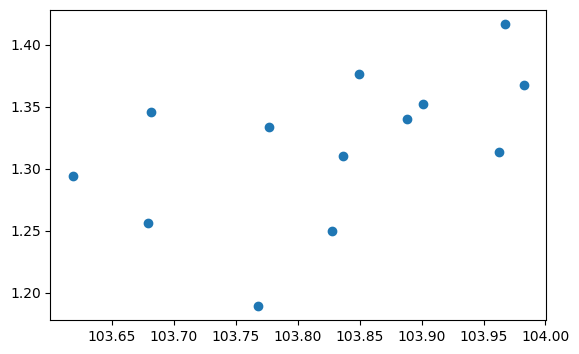

In [74]:
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df['longitude'], df['latitude'])],
    crs="EPSG:4326" # WGS84 for raw API data
)
gdf.plot(
    
)

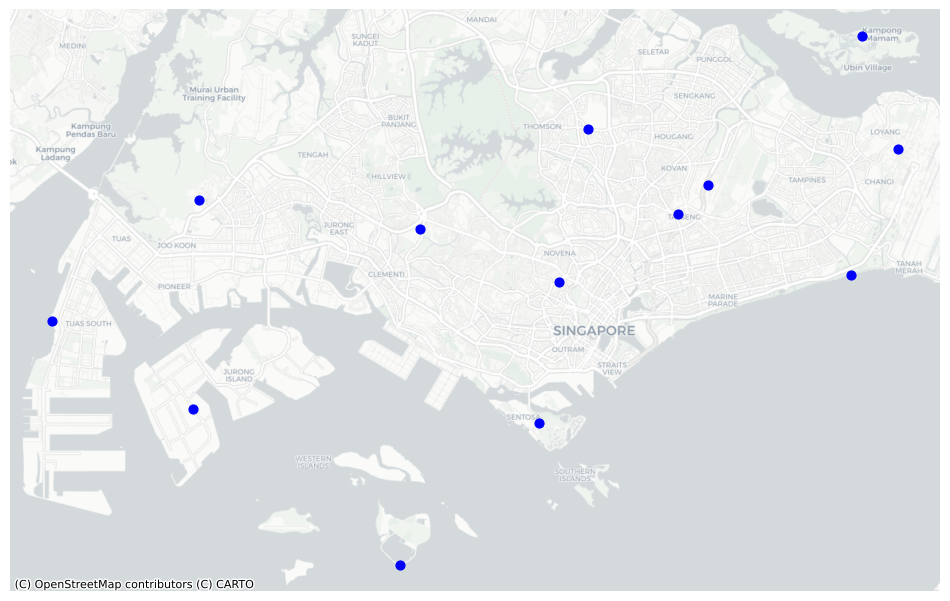

In [75]:
import contextily as ctx

gdf_3857 = gdf.to_crs(epsg=3857)


ax = gdf_3857.plot(
    figsize=(12, 12),
    color='blue',
    markersize=40
)

ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=12
)

ax.set_axis_off()
plt.show()


In [76]:
gdf

,id,deviceId,name,latitude,longitude,stationId,temperature_celsius,geometry
0,S109,S109,Ang Mo Kio Avenue 5,1.37640,103.84920,S109,31.9,POINT (103.8492 1.3764)
1,S106,S106,Pulau Ubin,1.41680,103.96730,S106,31.8,POINT (103.9673 1.4168)
2,S117,S117,Banyan Road,1.25600,103.67900,S117,29.9,POINT (103.679 1.256)
3,S107,S107,East Coast Parkway,1.31350,103.96250,S107,30.3,POINT (103.9625 1.3135)
4,S115,S115,Tuas South Avenue 3,1.29377,103.61843,S115,30.8,POINT (103.61843 1.29377)
5,S102,S102,Semakau Landfill,1.18900,103.76800,S102,29.8,POINT (103.768 1.189)
6,S60,S60,Sentosa,1.25000,103.82790,S60,30.1,POINT (103.8279 1.25)
7,S50,S50,Clementi Road,1.33370,103.77680,S50,30.7,POINT (103.7768 1.3337)
8,S44,S44,Nanyang Avenue,1.34583,103.68166,S44,31.0,POINT (103.68166 1.34583)
9,S43,S43,Kim Chuan Road,1.33990,103.88780,S43,31.5,POINT (103.8878 1.3399)


In [77]:
import folium

# center map on mean coordinate
m = folium.Map(
    location=[gdf.latitude.mean(), gdf.longitude.mean()],
    tiles="Cartodb Positron",
    zoom_start=12
)

for _, row in gdf.iterrows():
    folium.Marker(
        [row.latitude, row.longitude],
        popup=f"{row['name']} (ID: {row['id']}; Temperature: {row['temperature_celsius']:.2f}°C)"
    ).add_to(m)

m.save("map.html")

import webbrowser
webbrowser.open("map.html")


True

In [ ]:
# Plotly visualization of NEA real-time air temperature readings
plot_df = gdf.copy()

# Extract the latest NEA timestamp (if available) for display in the plot title
nea_timestamp = None
readings_block = data.get("data", {}).get("readings", []) if isinstance(data, dict) else []
if readings_block:
    ts_value = readings_block[0].get("timestamp")
    if ts_value:
        ts = pd.to_datetime(ts_value)
        if ts.tzinfo is None:
            ts = ts.tz_localize("Asia/Singapore")
        else:
            ts = ts.tz_convert("Asia/Singapore")
        nea_timestamp = ts.strftime("%Y-%m-%d %H:%M %Z")

fig = px.scatter_mapbox(
    plot_df,
    lat="latitude",
    lon="longitude",
    color="temperature_celsius",
    size="temperature_celsius",
    size_max=25,
    color_continuous_scale="Turbo",
    hover_name="name",
    hover_data={
        "temperature_celsius":":.1f",
        "id": True,
        "latitude":":.4f",
        "longitude":":.4f"
    },
    zoom=11,
    title=(
        "NEA real-time air temperature"
        if nea_timestamp is None
        else f"NEA real-time air temperature ({nea_timestamp})"
    )
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(l=10, r=10, t=60, b=10),
    coloraxis_colorbar=dict(title="Temperature (°C)")
)

fig.show()



In [78]:
# import folium
# from branca.colormap import LinearColormap
# import webbrowser

# # 1. Build a color scale from min→max temperature
# temps = gdf["temperature_celsius"]
# colormap = LinearColormap(
#     colors=["blue", "cyan", "yellow", "orange", "red"],
#     vmin=temps.min(),
#     vmax=temps.max()
# )
# colormap.caption = "Temperature (°C)"

# # 2. Create the base map centered on mean coordinate
# m = folium.Map(
#     location=[gdf.latitude.mean(), gdf.longitude.mean()],
#     tiles="CartoDB positron",   # note the exact casing
#     zoom_start=12
# )

# # 3. Add colored circle markers for each station
# for _, row in gdf.iterrows():
#     temp = row["temperature_celsius"]
#     color = colormap(temp)

#     folium.CircleMarker(
#         location=[row.latitude, row.longitude],
#         radius=7,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.9,
#         popup=(
#             f"{row['name']} (ID: {row['id']})<br>"
#             f"Temperature: {temp:.1f} °C"
#         ),
#     ).add_to(m)

# # 4. Add the legend (color scale) to the map
# colormap.add_to(m)

# # 5. Save and open in browser
# m.save("map_temperature.html")
# webbrowser.open("map_temperature.html")


In [ ]:
#1. Reproject points to a metric CRS (SVY21)
gdf_m = gdf.to_crs(3414)  # EPSG:3414 (SVY21)


# 2. 2D Gridding over Singapore
# grid size in meters
grid_size = 500  # 1 km grid

# bounding box
xmin, ymin, xmax, ymax = gdf_m.total_bounds

xgrid = np.arange(xmin, xmax, grid_size)
ygrid = np.arange(ymin, ymax, grid_size)

xx, yy = np.meshgrid(xgrid, ygrid)

# 3. Interpolation of Temperature
from scipy.interpolate import griddata

points = np.column_stack((gdf_m.geometry.x, gdf_m.geometry.y))
values = gdf_m["temperature_celsius"].values

grid_temp = griddata(
    points,
    values,
    (xx, yy),
    method="linear"
)
# Nearest neighbor boundary region
grid_temp_nn = griddata(points, values, (xx, yy), method="nearest")
grid_temp = np.where(np.isnan(grid_temp), grid_temp_nn, grid_temp)



In [83]:
from shapely.geometry import box
import geopandas as gpd

polygons = []
temps = []

for i in range(len(xgrid) - 1):
    for j in range(len(ygrid) - 1):
        temp = grid_temp[j, i]
        if np.isnan(temp):
            continue

        poly = box(
            xgrid[i],
            ygrid[j],
            xgrid[i + 1],
            ygrid[j + 1],
        )

        polygons.append(poly)
        temps.append(temp)

grid_gdf = gpd.GeoDataFrame(
    {"temperature": temps},
    geometry=polygons,
    crs=3414
)
grid_gdf = grid_gdf.to_crs(4326)


In [85]:
import folium

m = folium.Map(
    location=[gdf.latitude.mean(), gdf.longitude.mean()],
    tiles="CartoDB positron",
    zoom_start=12
)

folium.Choropleth(
    geo_data=grid_gdf.__geo_interface__,
    data=grid_gdf,
    columns=[grid_gdf.index, "temperature"],
    key_on="feature.id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0,
    legend_name="Interpolated Temperature (°C)"
).add_to(m)

m.save("temperature_choropleth.html")
import webbrowser
webbrowser.open("temperature_choropleth.html")


True